# Math 227C Problem Set 7

How does the size of the mitochondria in a cell depend on the size of the cell itself?

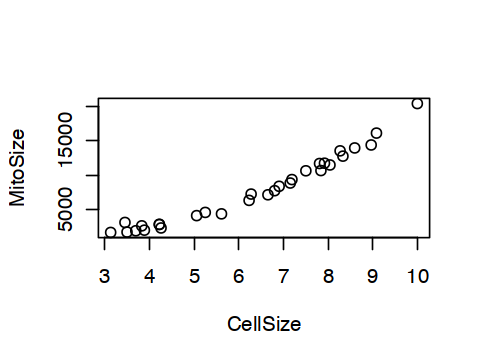

In [3]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (`nls`) to estimate the parameter $\alpha$ from the simulated data. Use (`b=1,a=5`) as starting guesses in the `nls` function.

alpha 
2.304121

Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simulated data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

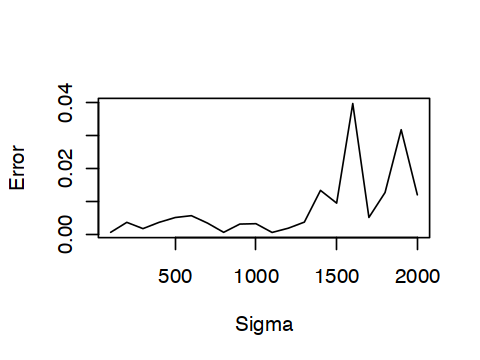

## Part 2

__(a)__ Transform the simulated data to $lY = \mathrm{log}(y)$ and $lX = \mathrm{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

lX 
2.161587

__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in $\alpha$ from nls and the error from lm (as functions of $\sigma$). 

## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

__(a)__ Find a distribution of $X$ data that makes a very big difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that makes a very small difference between the error from nls and error from lm.